In [1]:
# Hopfield Nrtwork

In [4]:
# As an AI language model, I can provide a general template for a Hopfield network. A Hopfield network is a type of artificial neural network that is used for pattern recognition and associative memory.

# Here is a basic implementation of a Hopfield network in Python:

# python
import numpy as np

class HopfieldNetwork:
    def __init__(self, num_neurons):
        self.num_neurons = num_neurons
        self.weights = np.zeros((num_neurons, num_neurons))
        
    def train(self, patterns):
        # Calculate the weight matrix
        for pattern in patterns:
            self.weights += np.outer(pattern, pattern)
        np.fill_diagonal(self.weights, 0)
        
    def predict(self, input_pattern, num_iterations=100):
        output_pattern = input_pattern
        for i in range(num_iterations):
            # Update the output pattern using the weight matrix
            output_pattern = np.sign(np.dot(self.weights, output_pattern))
        return output_pattern


# To use this Hopfield network, you need to create an instance of the `HopfieldNetwork` class with the appropriate number of neurons:

# python
# Create a Hopfield network with 4 neurons
hn = HopfieldNetwork(4)


# Then you can train the Hopfield network on your patterns using the `train` method:

# python
# Define your patterns
patterns = np.array([
    [1, -1, 1, -1],
    [-1, 1, -1, 1],
    [1, 1, -1, -1]
])

# Train the Hopfield network on your patterns
hn.train(patterns)


# Finally, you can use the `predict` method to retrieve the predicted output pattern for a given input pattern:

# python
# Test the Hopfield network on a new input pattern
input_pattern = np.array([-1, 1, -1, -1])
output_pattern = hn.predict(input_pattern)
print(output_pattern)


# Note that Hopfield networks have limitations and are not suitable for all types of pattern recognition problems. Additionally, the performance of the Hopfield network can be affected by the quality and quantity of the training patterns.


[-1.  1. -1. -1.]


#

In [10]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.cm as cm
from tqdm import tqdm

class HopfieldNetwork(object):      
    def train_weights(self, train_data):
        print("Start to train weights...")
        num_data =  len(train_data)
        self.num_neuron = train_data[0].shape[0]
        
        # initialize weights
        W = np.zeros((self.num_neuron, self.num_neuron))
        rho = np.sum([np.sum(t) for t in train_data]) / (num_data*self.num_neuron)
        
        # Hebb rule
        for i in tqdm(range(num_data)):
            t = train_data[i] - rho
            W += np.outer(t, t)
        
        # Make diagonal element of W into 0
        diagW = np.diag(np.diag(W))
        W = W - diagW
        W /= num_data
        
        self.W = W 
    
    def predict(self, data, num_iter=20, threshold=0, asyn=False):
        print("Start to predict...")
        self.num_iter = num_iter
        self.threshold = threshold
        self.asyn = asyn
        
        # Copy to avoid call by reference 
        copied_data = np.copy(data)
        
        # Define predict list
        predicted = []
        for i in tqdm(range(len(data))):
            predicted.append(self._run(copied_data[i]))
        return predicted
    
    def _run(self, init_s):
        if self.asyn==False:
            """
            Synchronous update
            """
            # Compute initial state energy
            s = init_s

            e = self.energy(s)
            
            # Iteration
            for i in range(self.num_iter):
                # Update s
                s = np.sign(self.W @ s - self.threshold)
                # Compute new state energy
                e_new = self.energy(s)
                
                # s is converged
                if e == e_new:
                    return s
                # Update energy
                e = e_new
            return s
        else:
            """
            Asynchronous update
            """
            # Compute initial state energy
            s = init_s
            e = self.energy(s)
            
            # Iteration
            for i in range(self.num_iter):
                for j in range(100):
                    # Select random neuron
                    idx = np.random.randint(0, self.num_neuron) 
                    # Update s
                    s[idx] = np.sign(self.W[idx].T @ s - self.threshold)
                
                # Compute new state energy
                e_new = self.energy(s)
                
                # s is converged
                if e == e_new:
                    return s
                # Update energy
                e = e_new
            return s
    
    
    def energy(self, s):
        return -0.5 * s @ self.W @ s + np.sum(s * self.threshold)

    def plot_weights(self):
        plt.figure(figsize=(6, 5))
        w_mat = plt.imshow(self.W, cmap=cm.coolwarm)
        plt.colorbar(w_mat)
        plt.title("Network Weights")
        plt.tight_layout()
        plt.savefig("weights.png")
        plt.show()

Start to data preprocessing...
Start to train weights...


100%|██████████| 4/4 [00:06<00:00,  1.54s/it]


Start to predict...


100%|██████████| 4/4 [00:03<00:00,  1.04it/s]


Show prediction results...


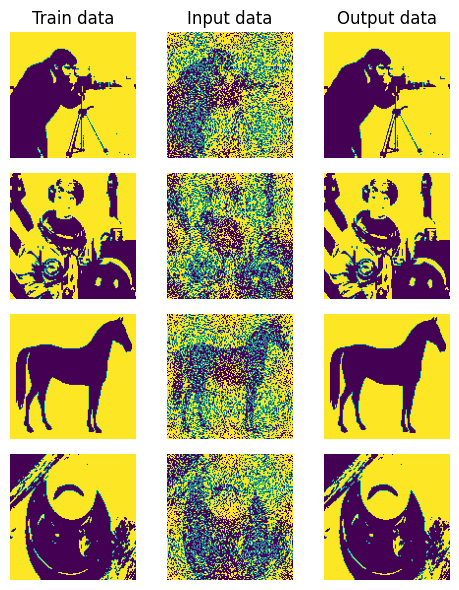

In [15]:
import numpy as np
np.random.seed(1)
from matplotlib import pyplot as plt
import skimage.data
from skimage.color import rgb2gray
from skimage.filters import threshold_mean
from skimage.transform import resize

# Utils
def get_corrupted_input(input, corruption_level):
    corrupted = np.copy(input)
    inv = np.random.binomial(n=1, p=corruption_level, size=len(input))
    for i, v in enumerate(input):
        if inv[i]:
            corrupted[i] = -1 * v
    return corrupted

def reshape(data):
    dim = int(np.sqrt(len(data)))
    data = np.reshape(data, (dim, dim))
    return data

def plot(data, test, predicted, figsize=(5, 6)):
    data = [reshape(d) for d in data]
    test = [reshape(d) for d in test]
    predicted = [reshape(d) for d in predicted]

    fig, axarr = plt.subplots(len(data), 3, figsize=figsize)
    for i in range(len(data)):
        if i==0:
            axarr[i, 0].set_title('Train data')
            axarr[i, 1].set_title("Input data")
            axarr[i, 2].set_title('Output data')

        axarr[i, 0].imshow(data[i])
        axarr[i, 0].axis('off')
        axarr[i, 1].imshow(test[i])
        axarr[i, 1].axis('off')
        axarr[i, 2].imshow(predicted[i])
        axarr[i, 2].axis('off')

    plt.tight_layout()
    plt.savefig("result.png")
    plt.show()

def preprocessing(img, w=128, h=128):
    # Resize image
    img = resize(img, (w,h), mode='reflect')

    # Thresholding
    thresh = threshold_mean(img)
    binary = img > thresh
    shift = 2*(binary*1)-1 # Boolian to int

    # Reshape
    flatten = np.reshape(shift, (w*h))
    return flatten

def main():
    # Load data
    camera = skimage.data.camera()
    astronaut = rgb2gray(skimage.data.astronaut())
    horse = skimage.data.horse()
    coffee = rgb2gray(skimage.data.coffee())

    # Marge data
    data = [camera, astronaut, horse, coffee]

    # Preprocessing
    print("Start to data preprocessing...")
    data = [preprocessing(d) for d in data]

    # Create Hopfield Network Model
    model = HopfieldNetwork()
    model.train_weights(data)

    # Generate testset
    test = [get_corrupted_input(d, 0.3) for d in data]

    predicted = model.predict(test, threshold=0, asyn=False)
    print("Show prediction results...")
    plot(data, test, predicted)

if __name__ == '__main__':
    main()